In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('../data/2001-2019-National-Data.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 19 non-null     int64  
 1   Veteran Suicide Deaths                               19 non-null     int64  
 2   Veteran Population Estimate                          19 non-null     int64  
 3   Veteran Crude Rate per 100,000                       19 non-null     float64
 4   Veteran Age Adjusted Rate per 100,000                19 non-null     float64
 5   Veteran Age and Sex Adjusted Rate per 100,000        19 non-null     float64
 6   Male Veteran Suicide Deaths                          19 non-null     int64  
 7   Male Veteran Population Estimate                     19 non-null     int64  
 8   Male Veteran Crude Rate per 100,000                  19 non-null     flo

In [20]:
df.isnull().values.sum()

0

In [21]:
df.describe()

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000","Veteran Age Adjusted Rate per 100,000","Veteran Age and Sex Adjusted Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000","Male Veteran Age Adjusted Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000","Female Veteran Age Adjusted Rate per 100,000",Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000","Non-Veteran Age Adjusted Rate per 100,000","Non-Veteran Age and Sex Adjusted Rate per 100,000",Male Non-Veteran Suicide Deaths,Male Non-Veteran Population Estimate,"Male Non-Veteran Crude Rate per 100,000","Male Non-Veteran Age Adjusted Rate per 100,000",Female Non-Veteran Suicide Deaths,Female Non-Veteran Population Estimate,"Female Non-Veteran Crude Rate per 100,000","Female Non-Veteran Age Adjusted Rate per 100,000",US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000","US Population Age Adjusted Rate per 100,000","US Population Age and Sex Adjusted Rate per 100,000",Male US Population Suicide Deaths,Male US Population Population Estimate,"Male US Population Crude Rate per 100,000","Male US Population Age Adjusted Rate per 100,000",Female US Population Suicide Deaths,Female US Population Population Estimate,"Female US Population Crude Rate per 100,000","Female US Population Age Adjusted Rate per 100,000"
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000
mean,2010.000000,6359.157895,2.280216e+07,28.115789,29.994737,22.310526,6122.894737,2.097958e+07,29.468421,32.489474,236.263158,1.822579e+06,12.831579,12.842105,31078.315789,2.117441e+08,14.563158,14.631579,15.905263,23347.736842,9.291966e+07,24.952632,26.568421,7730.578947,1.188245e+08,6.468421,6.547368,37437.473684,2.345463e+08,15.878947,15.931579,15.815789,29470.631579,1.138992e+08,25.752632,25.984211,7966.842105,1.206471e+08,6.557895,6.652632
std,5.627314,258.251011,1.824150e+06,3.185255,4.209971,4.096326,203.395590,1.914670e+06,3.391010,4.749608,68.970881,9.828774e+04,3.172810,3.365398,5478.833504,1.556860e+07,1.515919,1.549212,1.186720,4085.559201,8.874648e+06,2.022476,1.462134,1413.451147,6.694742e+06,0.823308,0.880258,5682.391900,1.374867e+07,1.501695,1.510354,1.453067,4220.283090,6.963897e+06,2.132387,2.030124,1479.938635,6.784904e+06,0.873890,0.887799
min,2001.000000,5981.000000,1.979700e+07,23.300000,24.400000,16.800000,5822.000000,1.780500e+07,24.200000,25.900000,134.000000,1.621000e+06,8.000000,7.600000,23591.000000,1.865648e+08,12.600000,12.700000,14.500000,18015.000000,7.854315e+07,22.600000,24.700000,5576.000000,1.080216e+08,5.200000,5.200000,29580.000000,2.122978e+08,13.900000,14.000000,13.900000,23850.000000,1.026552e+08,23.200000,23.600000,5730.000000,1.096426e+08,5.200000,5.300000
25%,2005.500000,6120.500000,2.145350e+07,24.900000,25.900000,18.350000,5943.500000,1.956100e+07,26.100000,27.800000,180.000000,1.766000e+06,9.950000,9.900000,25915.500000,1.989491e+08,13.050000,13.150000,14.850000,19479.000000,8.569793e+07,23.100000,25.300000,6499.500000,1.132511e+08,5.800000,5.800000,31981.000000,2.233076e+08,14.350000,14.350000,14.350000,25363.000000,1.082239e+08,23.600000,23.950000,6671.000000,1.150836e+08,5.800000,5.900000
50%,2010.000000,6437.000000,2.275200e+07,28.600000,29.500000,21.900000,6184.000000,2.096700e+07,29.900000,31.900000,233.000000,1.827000e+06,13.000000,12.800000,30813.000000,2.124490e+08,14.500000,14.600000,15.700000,23224.000000,9.319870e+07,24.900000,26.30

In [22]:
df['Veteran Suicide Deaths'].sum()

120824

In [23]:
df['Suicide Ratio']= df['Veteran Suicide Deaths']/df['US Population Suicide Deaths']*100

In [24]:
df['Veteran Ratio']= df['Veteran Population Estimate']/df['US Population Population Estimate']*100

In [25]:
df.head(20)

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000","Veteran Age Adjusted Rate per 100,000","Veteran Age and Sex Adjusted Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000","Male Veteran Age Adjusted Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000","Female Veteran Age Adjusted Rate per 100,000",Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000","Non-Veteran Age Adjusted Rate per 100,000","Non-Veteran Age and Sex Adjusted Rate per 100,000",Male Non-Veteran Suicide Deaths,Male Non-Veteran Population Estimate,"Male Non-Veteran Crude Rate per 100,000","Male Non-Veteran Age Adjusted Rate per 100,000",Female Non-Veteran Suicide Deaths,Female Non-Veteran Population Estimate,"Female Non-Veteran Crude Rate per 100,000","Female Non-Veteran Age Adjusted Rate per 100,000",US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000","US Population Age Adjusted Rate per 100,000","US Population Age and Sex Adjusted Rate per 100,000",Male US Population Suicide Deaths,Male US Population Population Estimate,"Male US Population Crude Rate per 100,000","Male US Population Age Adjusted Rate per 100,000",Female US Population Suicide Deaths,Female US Population Population Estimate,"Female US Population Crude Rate per 100,000","Female US Population Age Adjusted Rate per 100,000",Suicide Ratio,Veteran Ratio
0,2001,5989,25733000,23.3,24.4,17.1,5835,24112000,24.2,25.9,154,1621000,9.5,9.1,23591,186564780,12.6,12.7,14.8,18015,78543150,22.9,26.0,5576,108021630,5.2,5.2,29580,212297780,13.9,14.0,13.9,23850,102655150,23.2,23.6,5730,109642630,5.2,5.3,20.246788,12.121182
1,2002,6129,25398000,24.1,24.9,16.8,5995,23720000,25.3,26.8,134,1678000,8.0,7.6,24542,189290736,13.0,13.0,15.0,18643,80150723,23.3,26.3,5899,109140013,5.4,5.4,30671,214688736,14.3,14.3,14.3,24638,103870723,23.7,24.1,6033,110818013,5.4,5.5,19.983046,11.830150
2,2003,5981,24993000,23.9,26.1,18.1,5830,23288000,25.0,28.0,151,1705000,8.9,9.0,24578,192014175,12.8,12.8,14.7,18651,81706067,22.8,25.6,5927,110308108,5.4,5.4,30559,217007175,14.1,14.1,14.0,24481,104994067,23.3,23.7,6078,112013108,5.4,5.5,19.571976,11.517131
3,2004,5991,24756000,24.2,25.5,18.1,5822,23002000,25.3,27.4,169,1754000,9.6,9.6,25408,194751563,13.0,13.1,14.7,18989,83297063,22.8,25.2,6419,111454500,5.8,5.8,31399,219507563,14.3,14.3,14.3,24811,106299063,23.3,23.7,6588,113208500,5.8,5.9,19.080225,11.277971
4,2005,6112,24600000,24.8,25.7,18.6,5923,22757000,26.0,27.6,189,1843000,10.3,10.4,25498,197392930,12.9,12.9,14.5,19205,84799058,22.6,24.9,6293,112593872,5.6,5.6,31610,221992930,14.2,14.3,14.2,25128,107556058,23.4,23.7,6482,114436872,5.7,5.7,19.335653,11.081434
5,2006,6019,24117000,25.0,25.4,18.0,5845,22295000,26.2,27.5,174,1822000,9.5,9.4,26333,200505198,13.1,13.2,14.6,19753,86596802,22.8,24.7,6580,113908396,5.8,5.8,32352,224622198,14.4,14.4,14.4,25598,108891802,23.5,23.8,6754,115730396,5.8,5.9,18.604723,10.736695
6,2007,6232,23649000,26.4,26.9,19.2,6046,21871000,27.6,29.2,186,1778000,10.5,10.2,27522,203562802,13.5,13.5,14.9,20569,88309976,23.3,24.9,6953,115252826,6.0,6.1,33754,227211802,14.9,14.9,14.8,26615,110180976,24.2,24.4,7139,117030826,6.1,6.2,18.462997,10.408350
7,2008,6555,23333000,28.1,28.8,21.1,6346,21593000,29.4,31.2,209,1740000,12.0,11.9,28490,206656364,13.8,13.8,15.1,21380,89980088,23.8,25.3,7110,116676276,6.1,6.2,35045,229989364,15.2,15.3,15.2,27726,111573088,24.9,25.1,7319,118416276,6.2,6.3,18.704523,10.145252
8,2009,6506,22983000,28.3,28.9,21.5,6278,21203000,29.6,31.1,228,1780000,12.8,13.0,29333,209654362,14.0,14.0,15.2,22030,91680196,24.0,25.3,7303,117974166,6.2,6.3,35839,232637362,15.4,15.5,15.4,28308,112883196,25.1,25.3,7531,119754166,6.3,6.4,18.153408,9.879325
9,2010,6535,22752000,28.7,29.5,21.9,6302,20967000,30.1,31.9,233,1785000,13.1,12.8,30813,212449

In [26]:
df.tail(1)

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000","Veteran Age Adjusted Rate per 100,000","Veteran Age and Sex Adjusted Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000","Male Veteran Age Adjusted Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000","Female Veteran Age Adjusted Rate per 100,000",Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000","Non-Veteran Age Adjusted Rate per 100,000","Non-Veteran Age and Sex Adjusted Rate per 100,000",Male Non-Veteran Suicide Deaths,Male Non-Veteran Population Estimate,"Male Non-Veteran Crude Rate per 100,000","Male Non-Veteran Age Adjusted Rate per 100,000",Female Non-Veteran Suicide Deaths,Female Non-Veteran Population Estimate,"Female Non-Veteran Crude Rate per 100,000","Female Non-Veteran Age Adjusted Rate per 100,000",US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000","US Population Age Adjusted Rate per 100,000","US Population Age and Sex Adjusted Rate per 100,000",Male US Population Suicide Deaths,Male US Population Population Estimate,"Male US Population Crude Rate per 100,000","Male US Population Age Adjusted Rate per 100,000",Female US Population Suicide Deaths,Female US Population Population Estimate,"Female US Population Crude Rate per 100,000","Female US Population Age Adjusted Rate per 100,000",Suicide Ratio,Veteran Ratio
18,2019,6261,19797000,31.6,35.3,26.9,5964,17805000,33.5,38.8,297,1992000,14.9,15.4,39600,235403373,16.8,16.9,17.7,30146,106543656,28.3,29.0,9454,128859717,7.3,7.5,45861,255200373,18.0,18.0,17.8,36110,124348656,29.0,29.1,9751,130851717,7.5,7.6,13.652123,7.757434


In [27]:
#df_year = df.set_index('Year')

In [28]:
#df_year.head(20)

In [29]:
#df_rate = pd.DataFrame(
 #   {'vet': df_year['Veteran Suicide Deaths'] / df_year['Veteran Population Estimate'],
 #   'non-vet': df_year['Non-Veteran Suicide Deaths'] / df_year['Non-Veteran Population Estimate'],
 #   'population': df_year['US Population Suicide Deaths'] / df_year['US Population Population Estimate'],
 #   'vet-ratio': df_year['Veteran Ratio'],
 #   'non-vet-ratio': df_year['Non Veteran Ratio']})


In [30]:
#df_rate.describe()

In [31]:
#df_rate.head()

In [32]:
#x = df_rate['vet'].mean()
#x_var = df_rate['vet'].var()
#X = df_rate['population'].mean()
#f = df_rate['vet-ratio']
#z = (x - X)/((x_var)(1-f))**.5

In [33]:
#df_rate.hist(figsize = (12,5), grid = False)
#plt.tight_layout()

In [34]:
df_all = df[['Veteran Crude Rate per 100,000', 'Non-Veteran Crude Rate per 100,000', 'US Population Crude Rate per 100,000']]

In [35]:
df_all.head(20)

,"Veteran Crude Rate per 100,000","Non-Veteran Crude Rate per 100,000","US Population Crude Rate per 100,000"
0,23.3,12.6,13.9
1,24.1,13.0,14.3
2,23.9,12.8,14.1
3,24.2,13.0,14.3
4,24.8,12.9,14.2
5,25.0,13.1,14.4
6,26.4,13.5,14.9
7,28.1,13.8,15.2
8,28.3,14.0,15.4
9,28.7,14.5,15.9


In [36]:
#df['Veteran Ratio'] = df['Veteran Population Estimate']/ df['US Population Population Estimate']

In [37]:
#df['Non Veteran Ratio'] = df['Non-Veteran Population Estimate']/ df['US Population Population Estimate']

In [38]:
df['Veteran Suicide rate per million'] = df['Veteran Suicide Deaths']/df['Veteran Population Estimate']*1000000
df['Non-Veteran Suicide rate per million'] = df['Non-Veteran Suicide Deaths']/df['Non-Veteran Population Estimate']*1000000
df['US Population Suicide rate per million'] = df['US Population Suicide Deaths']/df['US Population Population Estimate']*1000000

In [39]:
#df.head(20)

In [40]:
df_pop = df[['Year', 'Veteran Suicide Deaths','Veteran Population Estimate', 'Veteran Crude Rate per 100,000', 'Veteran Suicide rate per million', 'Non-Veteran Suicide Deaths', 'Non-Veteran Population Estimate', 'Non-Veteran Crude Rate per 100,000', 'Non-Veteran Suicide rate per million',  'US Population Suicide Deaths', 'US Population Population Estimate', 'US Population Crude Rate per 100,000', 'US Population Suicide rate per million']]

In [41]:
df_pop.head(20)

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Veteran Suicide rate per million,Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000",Non-Veteran Suicide rate per million,US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000",US Population Suicide rate per million
0,2001,5989,25733000,23.3,232.736175,23591,186564780,12.6,126.449376,29580,212297780,13.9,139.332592
1,2002,6129,25398000,24.1,241.318214,24542,189290736,13.0,129.652409,30671,214688736,14.3,142.862642
2,2003,5981,24993000,23.9,239.307006,24578,192014175,12.8,128.000967,30559,217007175,14.1,140.820229
3,2004,5991,24756000,24.2,242.001939,25408,194751563,13.0,130.463651,31399,219507563,14.3,143.042907
4,2005,6112,24600000,24.8,248.455285,25498,197392930,12.9,129.173826,31610,221992930,14.2,142.391922
5,2006,6019,24117000,25.0,249.574989,26333,200505198,13.1,131.333254,32352,224622198,14.4,144.028508
6,2007,6232,23649000,26.4,263.520656,27522,203562802,13.5,135.201519,33754,227211802,14.9,148.557424
7,2008,6555,23333000,28.1,280.932585,28490,206656364,13.8,137.861711,35045,229989364,15.2,152.376612
8,2009,6506,22983000,28.3,283.078797,29333,209654362,14.0,139.911232,35839,232637362,15.4,154.055220
9,2010,6535,22752000,28.7,287.227496,30813,212449000,14.5,145.037162,37348,235201000,15.9,158.791842


In [42]:
df_pop.describe()

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Veteran Suicide rate per million,Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000",Non-Veteran Suicide rate per million,US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000",US Population Suicide rate per million
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000
mean,2010.000000,6359.157895,2.280216e+07,28.115789,281.256586,31078.315789,2.117441e+08,14.563158,145.738429,37437.473684,2.345463e+08,15.878947,158.801516
std,5.627314,258.251011,1.824150e+06,3.185255,31.950348,5478.833504,1.556860e+07,1.515919,15.126876,5682.391900,1.374867e+07,1.501695,14.931197
min,2001.000000,5981.000000,1.979700e+07,23.300000,232.736175,23591.000000,1.865648e+08,12.600000,126.449376,29580.000000,2.122978e+08,13.900000,139.332592
25%,2005.500000,6120.500000,2.145350e+07,24.900000,249.015137,25915.500000,1.989491e+08,13.050000,130.898452,31981.000000,2.233076e+08,14.350000,143.535708
50%,2010.000000,6437.000000,2.275200e+07,28.600000,285.822122,30813.000000,2.124490e+08,14.500000,145.037162,37348.000000,2.352010e+08,15.900000,158.791842
75%,2014.500000,6545.000000,2.435850e+07,30.800000,308.391432,35508.000000,2.244237e+08,15.800000,158.206366,42134.000000,2.458772e+08,17.100000,171.353279
max,2019.000000,6761.000000,2.573300e+07,33.000000,330.258852,39850.000000,2.354034e+08,17.100000,170.881636,46510.000000,2.552004e+08,18.400000,183.566728


In [43]:
df_pop['Veteran Population Estimate (million)'] = df_pop['Veteran Population Estimate']/1000000
df_pop['Non-Veteran Population Estimate (million)'] = df_pop['Non-Veteran Population Estimate']/1000000
df_pop['US Population Population Estimate (million)'] = df_pop['US Population Population Estimate']/1000000

/tmp/ipykernel_114/3923208286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['Veteran Population Estimate (million)'] = df_pop['Veteran Population Estimate']/1000000
/tmp/ipykernel_114/3923208286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['Non-Veteran Population Estimate (million)'] = df_pop['Non-Veteran Population Estimate']/1000000
/tmp/ipykernel_114/3923208286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [44]:
def create_line_plot(df,colx,coly,xlabel,ylabel,title):
    fig, ax = plt.subplots(figsize = (10,8))
x = df[colx]
y = df[coly]
sns.lineplot(x, y, marker='o')
ax.set_ylabel(xlabel, fontsize = 15)
ax.set_xlabel(ylabel, fontsize = 15)
ax.set_title(title, fontsize = 20)
ax.set_xticks(df['Year'])
plt.yticks(fontsize = 13)
plt.ylim((0,30))
fig.tight_layout()  

def plot_bar_graph(df,colx,coly):
    fig, ax = plt.subplots(figsize=[8, 6])
    ax = sns.barplot(x=df[colx], y = df[coly])
    ax.set_ylabel('Monthly Reported Cases', fontsize = 15)
    ax.set_xlabel('Month (2020)', fontsize = 15)
    ax.set_title(input('Fig Title: '), fontsize = 20)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    fig.tight_layout()
#plt.savefig('images/', dpi=100)

NameError: name 'colx' is not defined

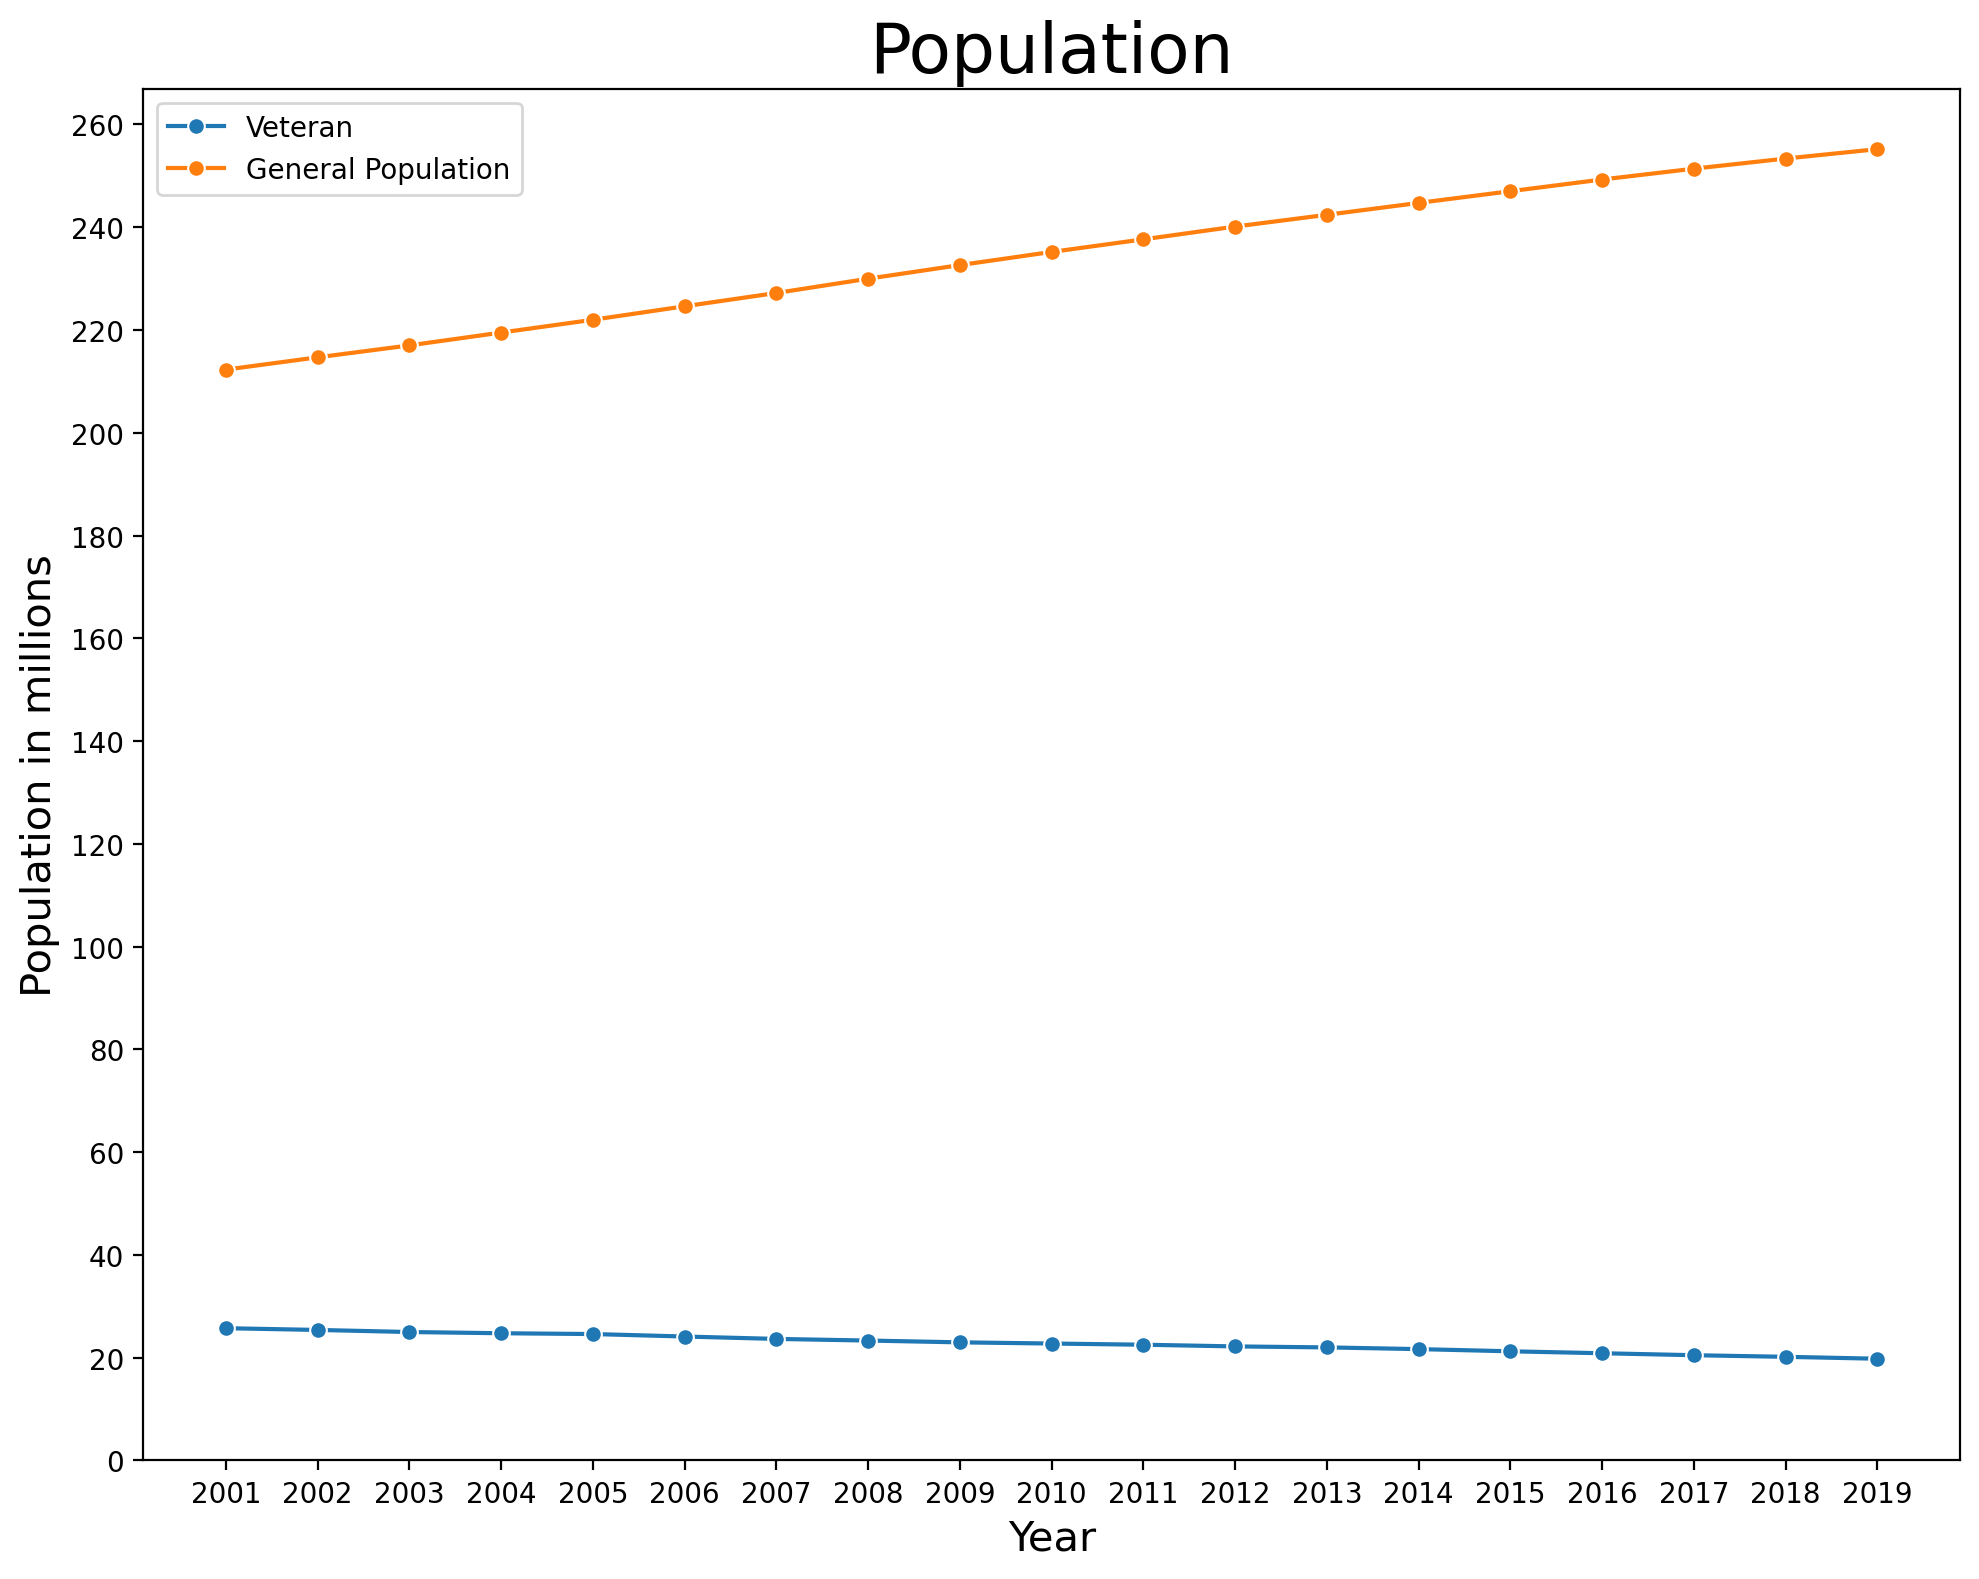

In [49]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x = df_pop['Year'], y =df_pop['Veteran Population Estimate (million)'], marker='o', label='Veteran')
sns.lineplot(x = df_pop['Year'], y =df_pop['US Population Population Estimate (million)'], marker='o', label='General Population')
#sns.lineplot(x = df_pop['Year'], y =df_pop['Non-Veteran Population Estimate (million)'], marker='o', label='Non-Veteran')
ax.set_ylabel('Population in millions', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Population', fontsize = 25)
ax.set_xticks(df_pop['Year'])
ax.set_yticks(np.arange(0, 280, 20))
plt.yticks(fontsize = 10)
fig.tight_layout()

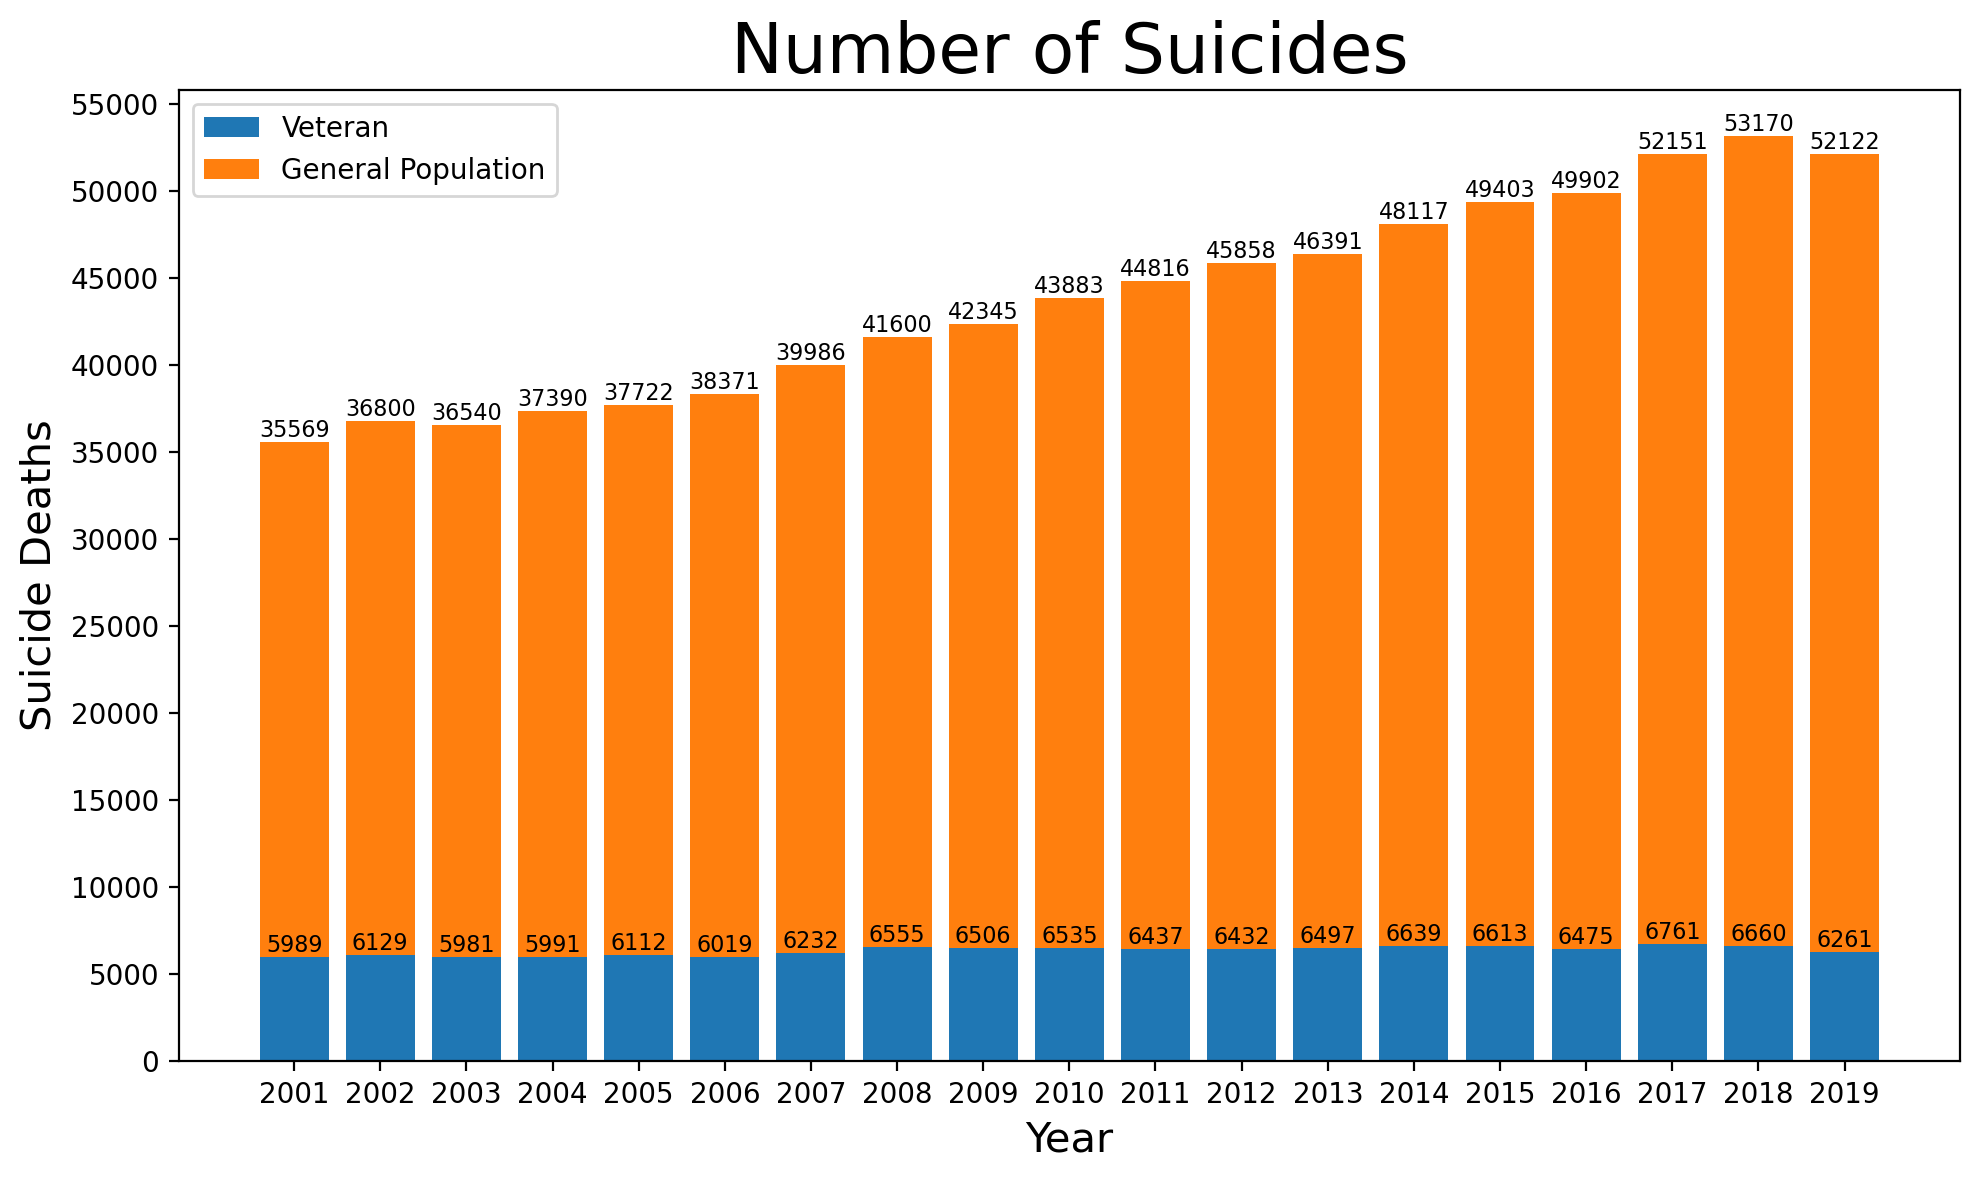

In [51]:
N = 19
 
vets = df_pop['Veteran Suicide Deaths']
gen = df_pop['US Population Suicide Deaths']
ind = np.arange(N)  
width = 0.8
 
fig, ax = plt.subplots(figsize =(10, 6), dpi=200)
ax1 = plt.bar(ind, vets, width)
ax2 = plt.bar(ind, gen, width, bottom = vets)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Suicide Deaths', fontsize = 15)
plt.title('Number of Suicides', fontsize = 25)
plt.xticks(ind, (df_pop['Year']))
plt.yticks(np.arange(0, 60000, 5000))
plt.legend((ax1[0], ax2[0]), ('Veteran', 'General Population'))
plt.bar_label(ax.containers[0],size=8)
plt.bar_label(ax.containers[1],size=8)
fig.tight_layout()
plt.show()

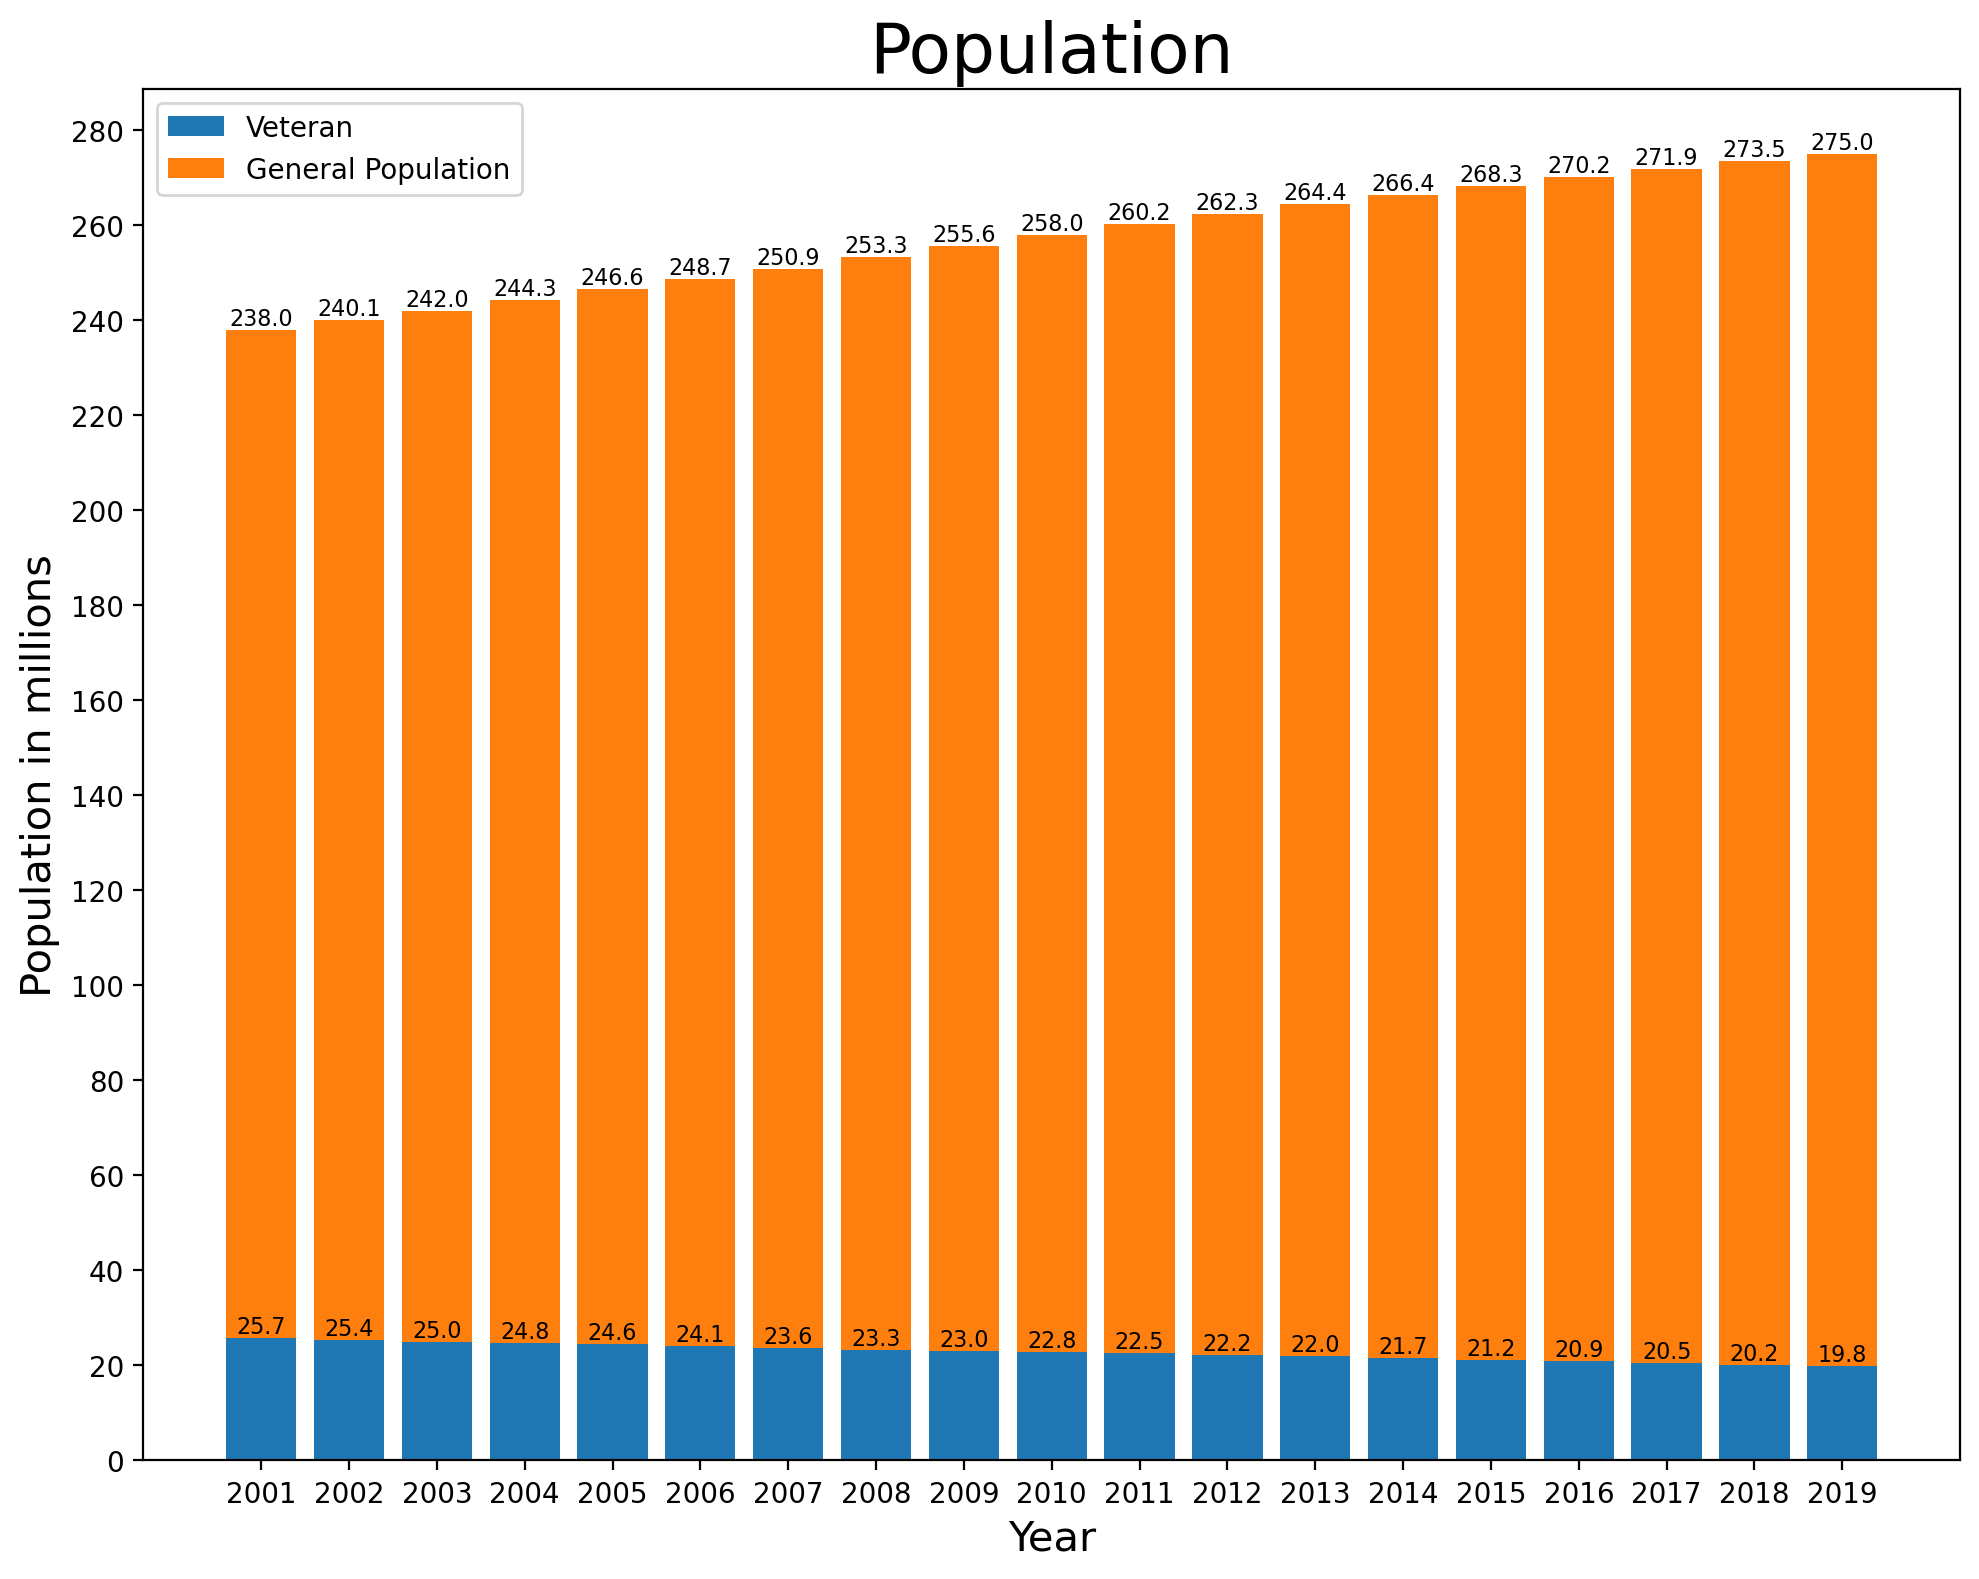

In [68]:
N = 19
 
vets = df_pop['Veteran Population Estimate (million)']
gen = df_pop['US Population Population Estimate (million)']
ind = np.arange(N)  
width = 0.8
 
fig, ax = plt.subplots(figsize =(10, 8), dpi=200)
ax1 = plt.bar(ind, vets, width)
ax2 = plt.bar(ind, gen, width, bottom = vets)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Population in millions', fontsize = 15)
plt.title('Population', fontsize = 25)
plt.xticks(ind, (df_pop['Year']))
ax.set_yticks(np.arange(0, 300, 20))
plt.legend((ax1[0], ax2[0]), ('Veteran', 'General Population'))
plt.bar_label(ax.containers[0], fmt='%.1f', size=8)
plt.bar_label(ax.containers[1], fmt='%.1f', size=8)
fig.tight_layout()
plt.show()

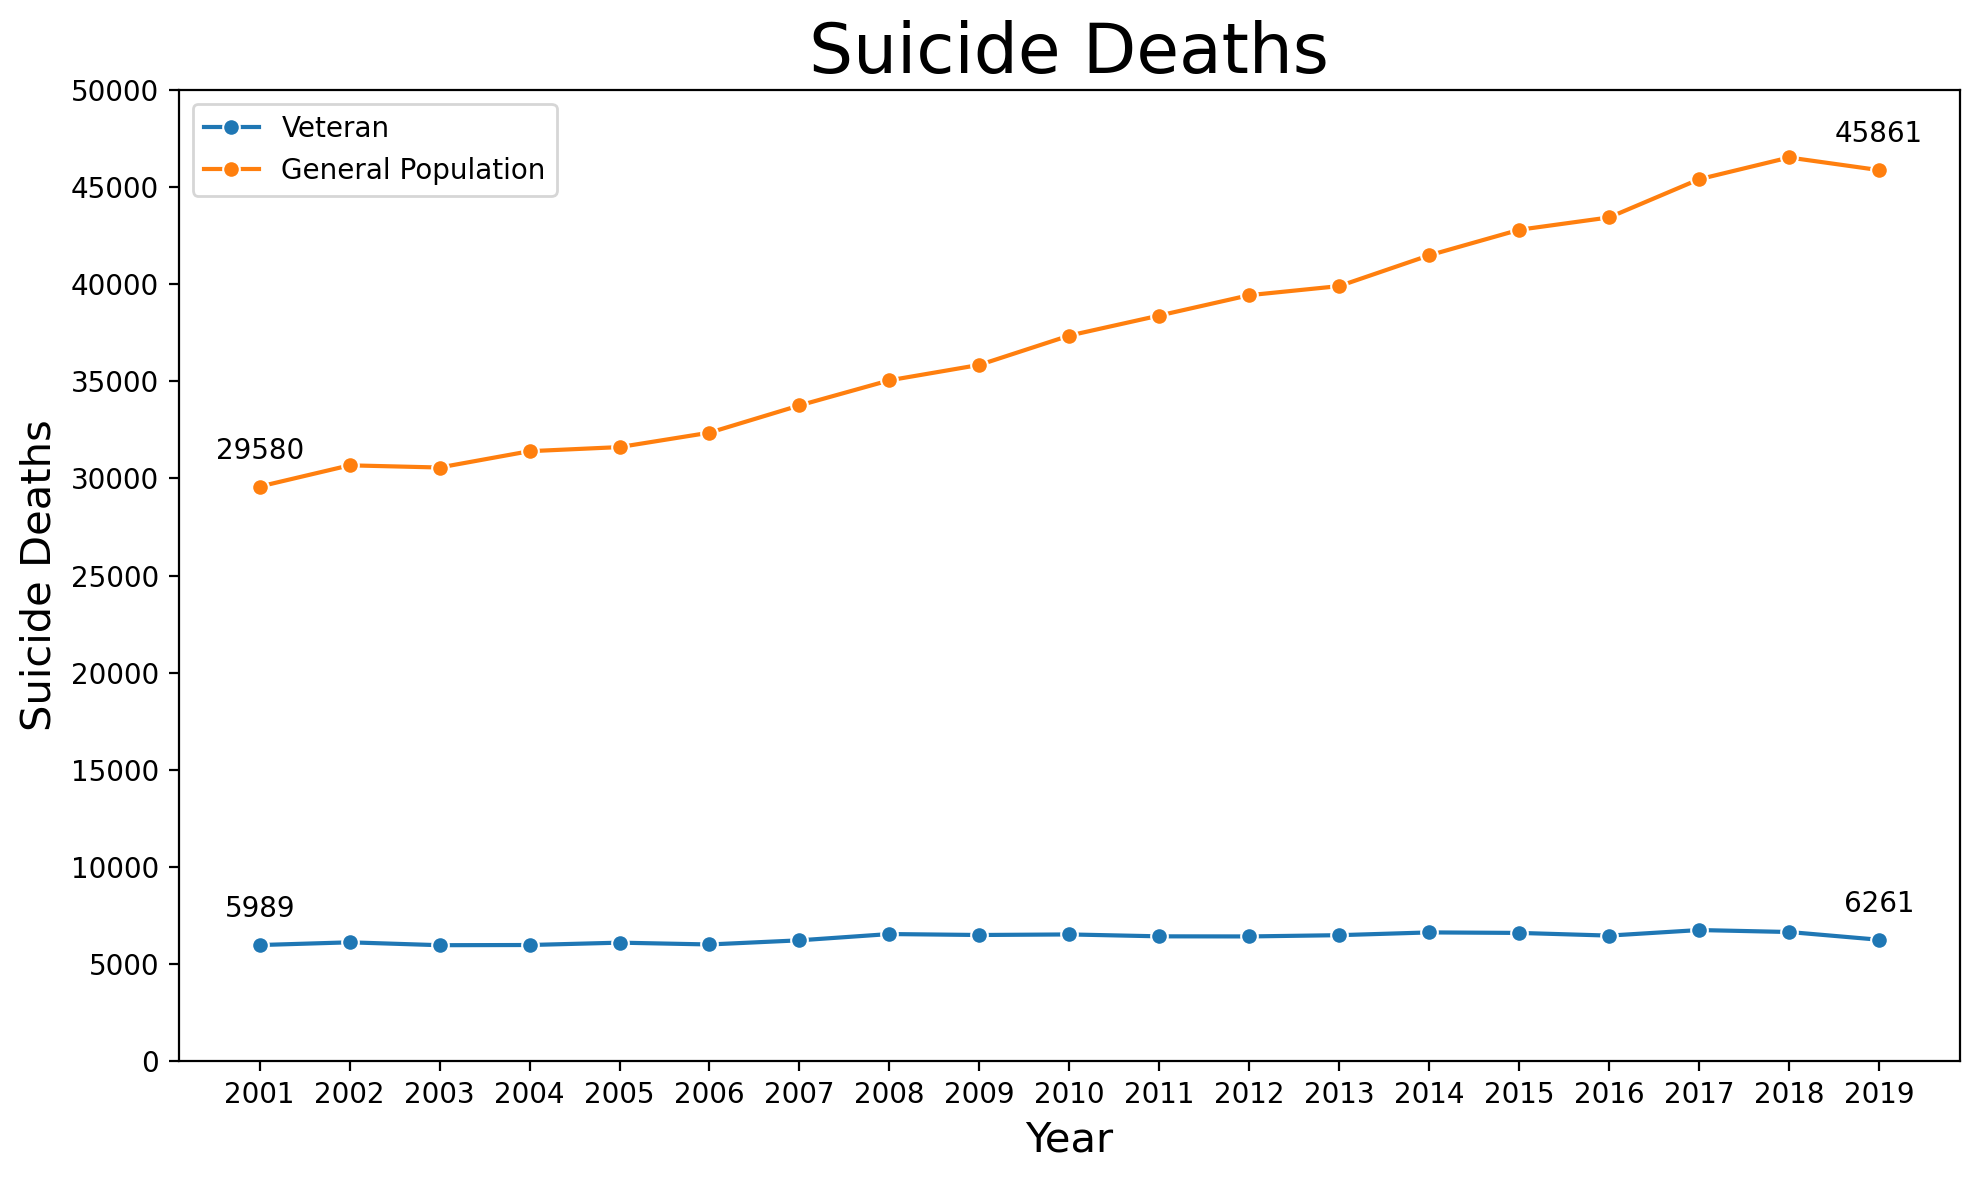

In [47]:
fig, ax = plt.subplots(figsize = (10,6), dpi=200)
sns.lineplot(x = df_pop['Year'], y =df_pop['Veteran Suicide Deaths'], marker='o', label= 'Veteran')
sns.lineplot(x = df_pop['Year'], y =df_pop['US Population Suicide Deaths'], marker='o', label= 'General Population')
#sns.lineplot(x = df_pop['Year'], y =df_pop['Non-Veteran Suicide rate per million'], marker='o', label= 'Non-Veteran')
ax.set_ylabel('Suicide Deaths', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Suicide Deaths', fontsize = 25)
ax.set_xticks(df_pop['Year'])
ax.set_yticks(np.arange(0, 55000, 5000))
ax.annotate(df_pop['Veteran Suicide Deaths'].values[0], xy=(df_pop['Year'][0], df_pop['Veteran Suicide Deaths'][0]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)
ax.annotate(df_pop['Veteran Suicide Deaths'].values[18], xy=(df_pop['Year'][18], df_pop['Veteran Suicide Deaths'][18]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center)
ax.annotate(df_pop['US Population Suicide Deaths'].values[0], xy=(df_pop['Year'][0], df_pop['US Population Suicide Deaths'][0]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center))
ax.annotate(df_pop['US Population Suicide Deaths'].values[18], xy=(df_pop['Year'][18], df_pop['US Population Suicide Deaths'][18]),                  
                 textcoords="offset points", # how to position the text,
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center))
plt.yticks(fontsize = 10)
fig.tight_layout()

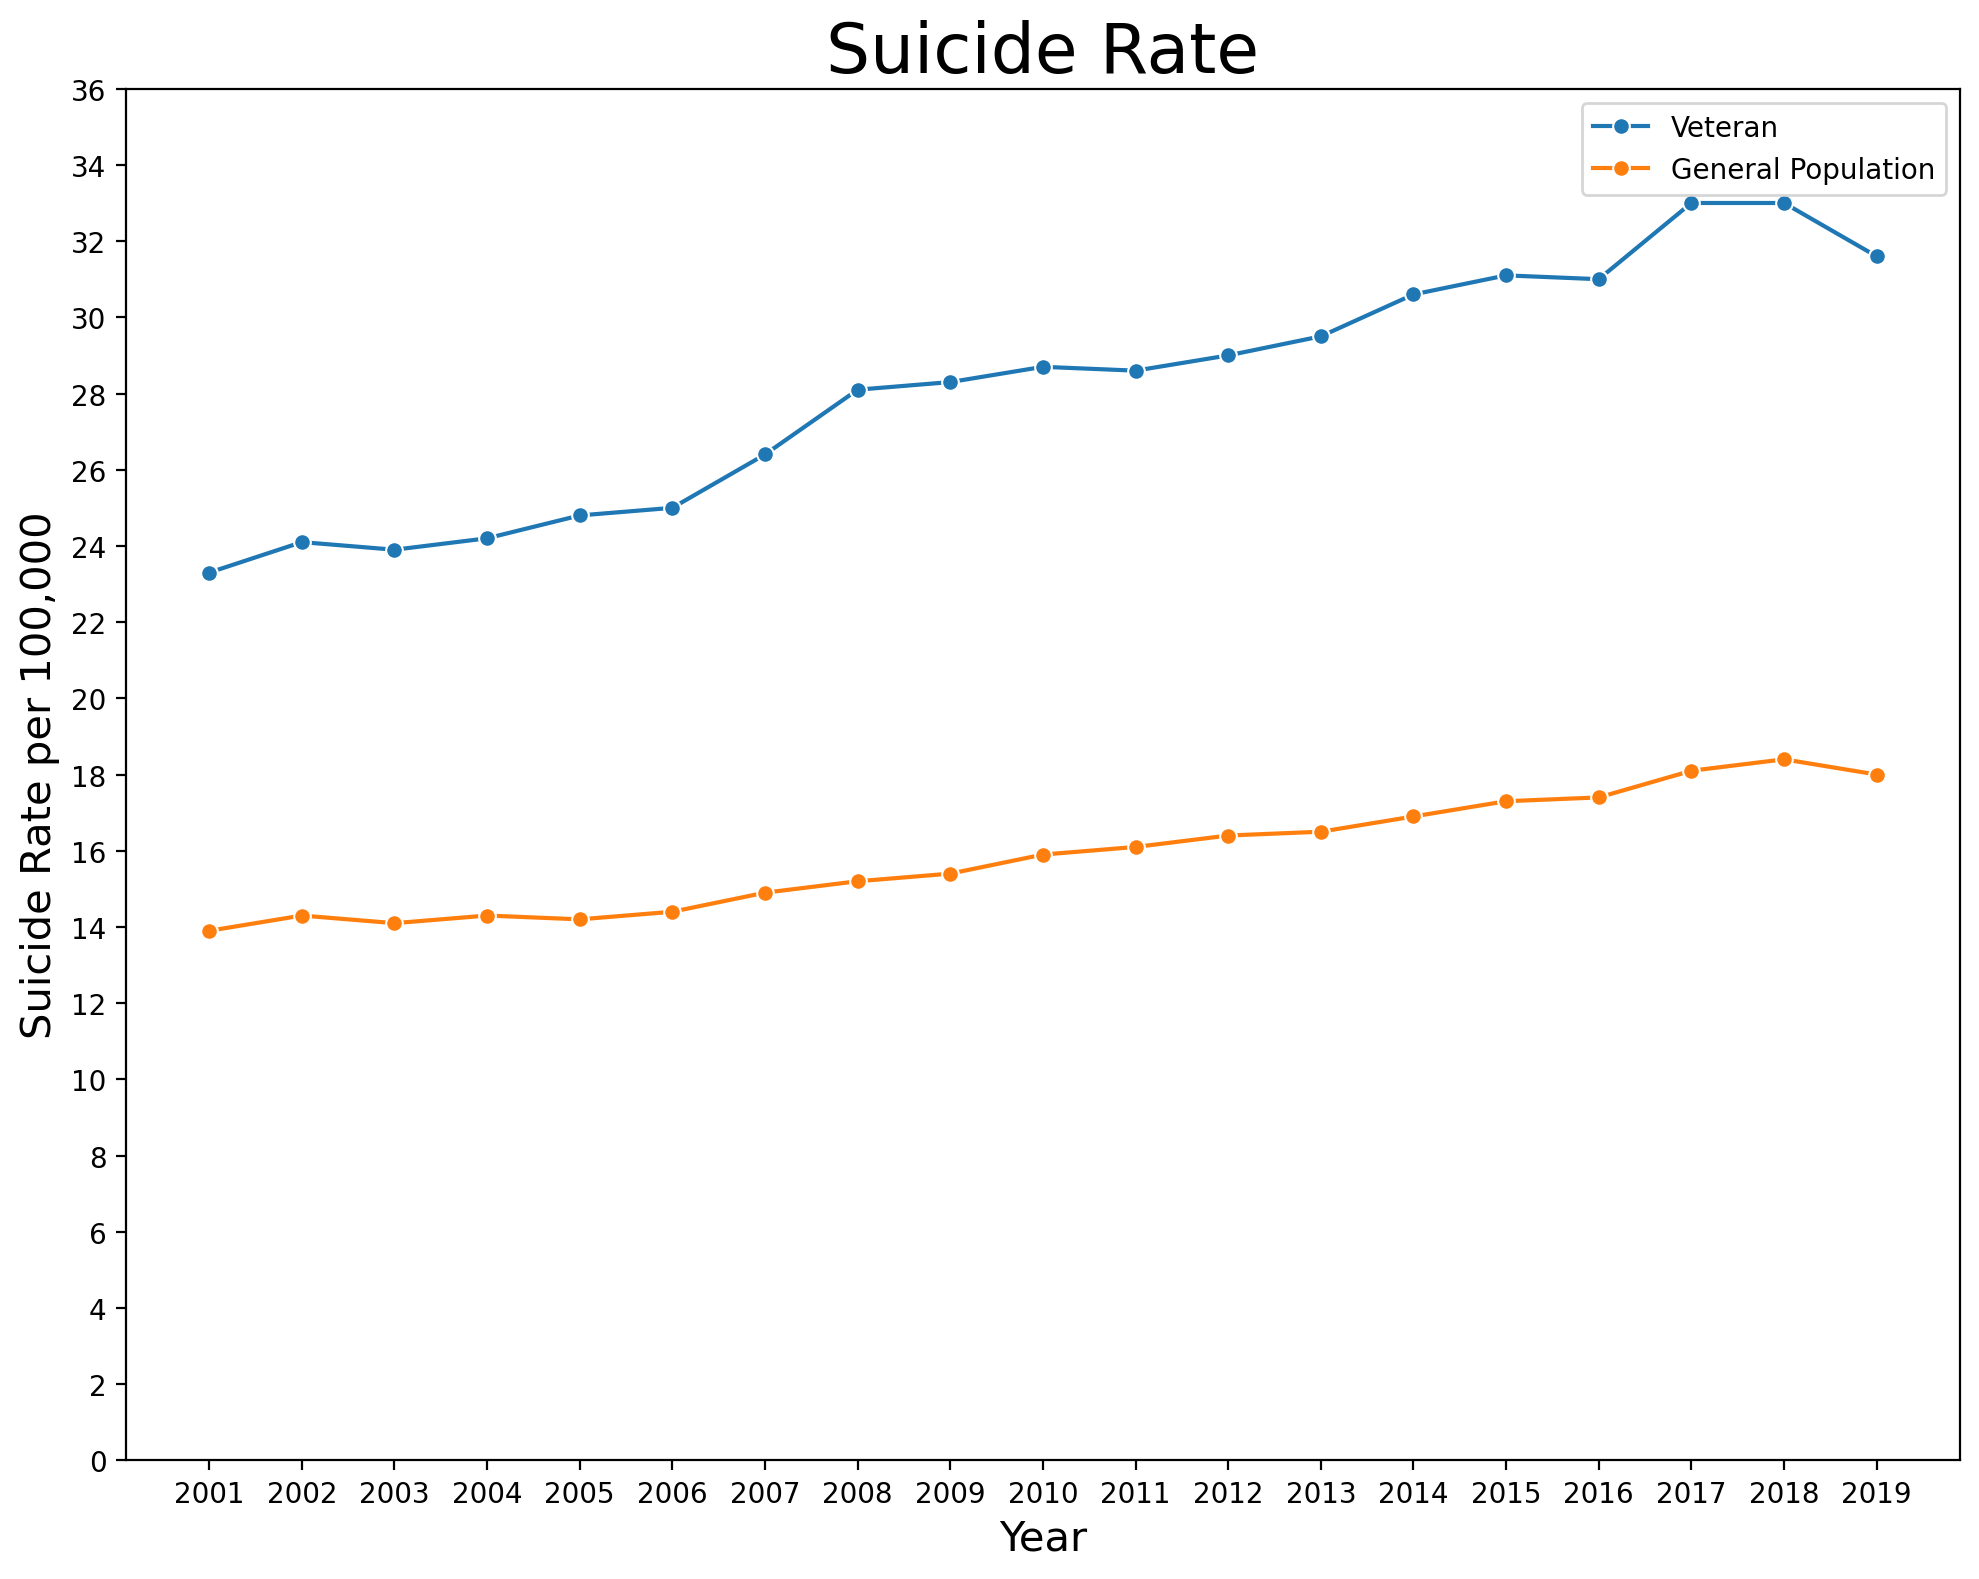

In [48]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x = df_pop['Year'], y =df_pop['Veteran Crude Rate per 100,000'], marker='o', label= 'Veteran')
sns.lineplot(x = df_pop['Year'], y =df_pop['US Population Crude Rate per 100,000'], marker='o', label= 'General Population')
#sns.lineplot(x = df_pop['Year'], y =df_pop['Non-Veteran Suicide rate per million'], marker='o', label= 'Non-Veteran')
ax.set_ylabel('Suicide Rate per 100,000', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Suicide Rate', fontsize = 25)
ax.set_xticks(df_pop['Year'])
ax.set_yticks(np.arange(0, 38, 2))
plt.yticks(fontsize = 10)
fig.tight_layout()

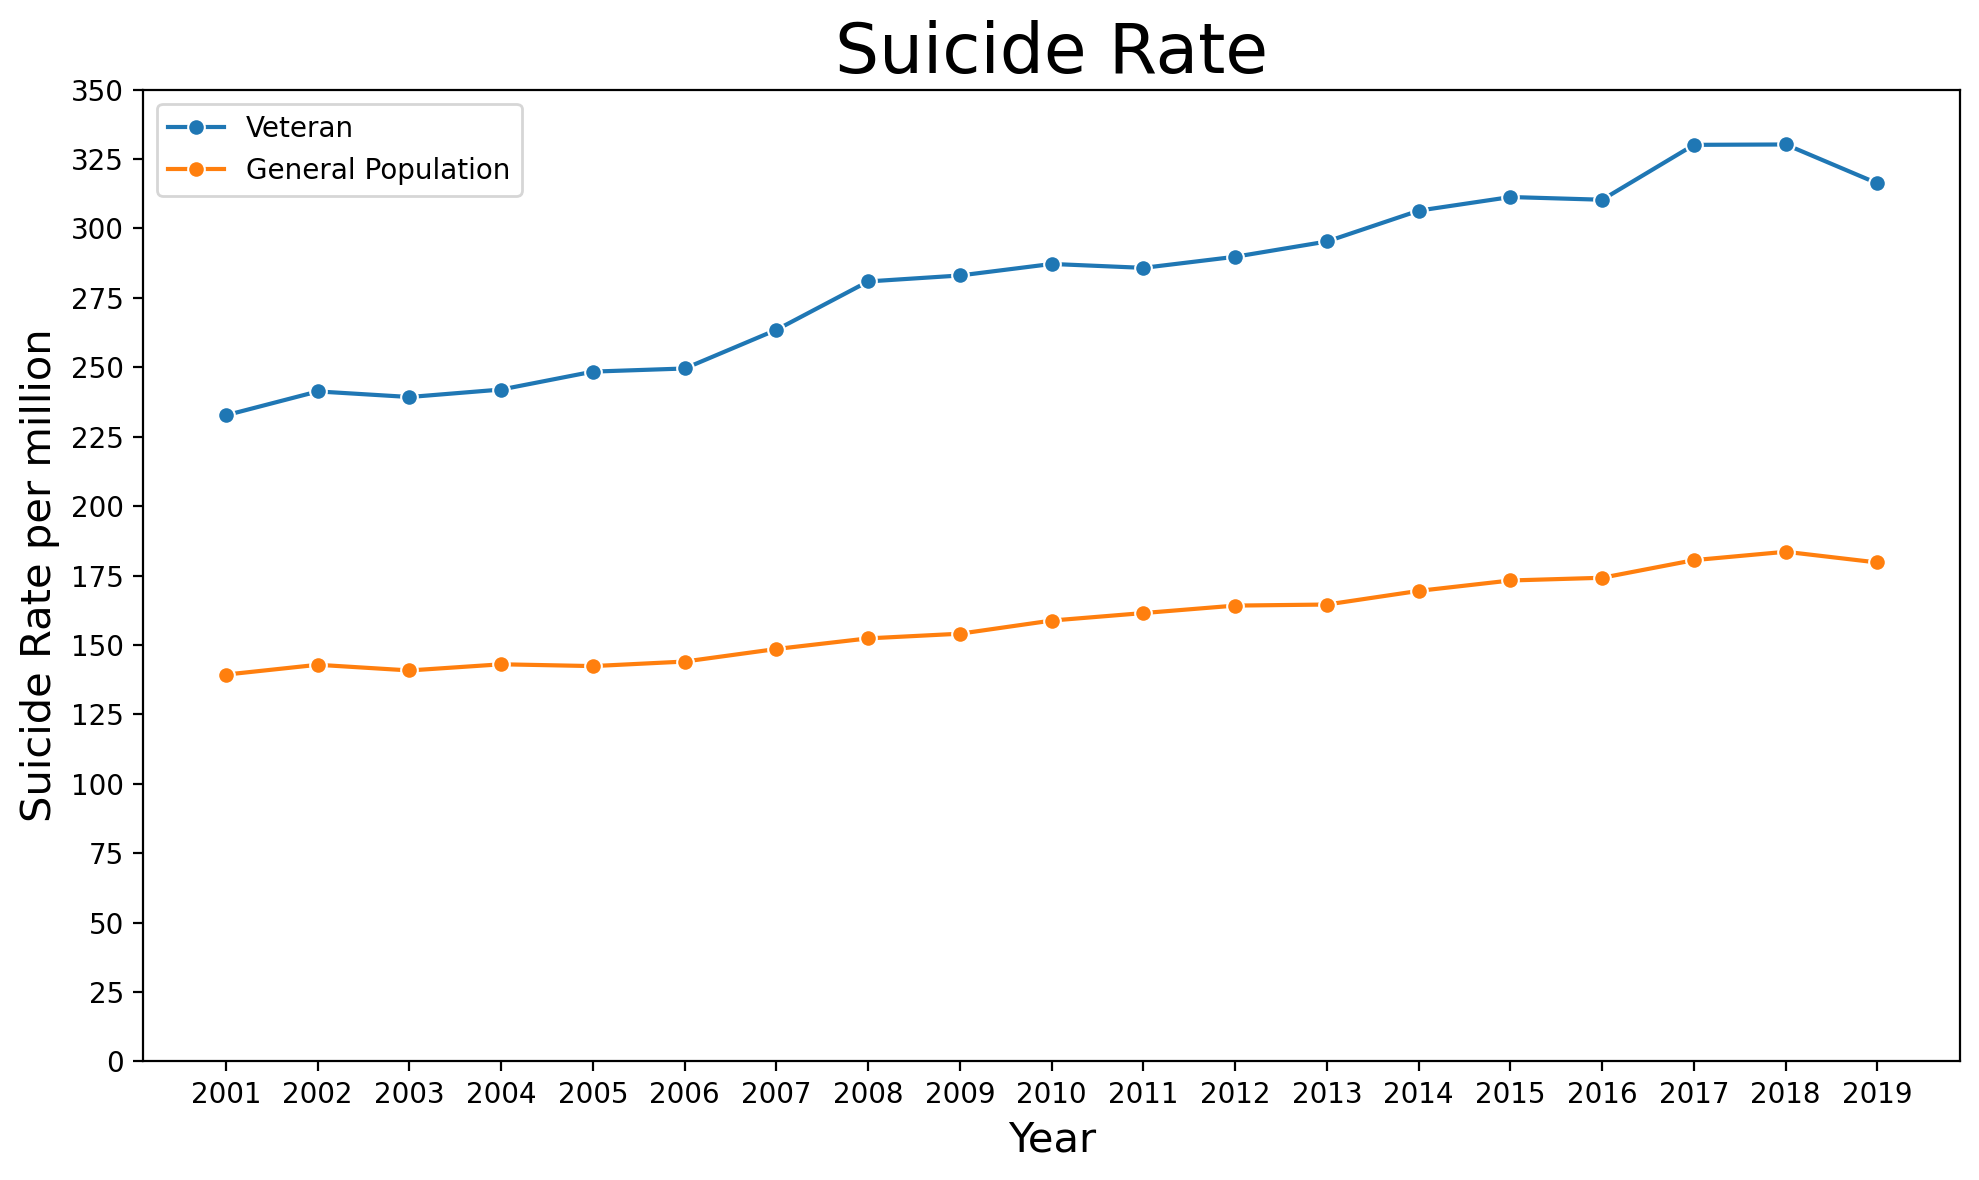

In [30]:
fig, ax = plt.subplots(figsize = (10,6), dpi=200)
sns.lineplot(x = df_pop['Year'], y =df_pop['Veteran Suicide rate per million'], marker='o', label= 'Veteran')
sns.lineplot(x = df_pop['Year'], y =df_pop['US Population Suicide rate per million'], marker='o', label= 'General Population')
#sns.lineplot(x = df_pop['Year'], y =df_pop['Non-Veteran Suicide rate per million'], marker='o', label= 'Non-Veteran')
ax.set_ylabel('Suicide Rate per million', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_title('Suicide Rate', fontsize = 25)
ax.set_xticks(df_pop['Year'])
ax.set_yticks(np.arange(0, 360, 25))
plt.yticks(fontsize = 10)
fig.tight_layout()

In [31]:
df_pop.describe()

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Veteran Suicide rate per million,Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000",Non-Veteran Suicide rate per million,US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000",US Population Suicide rate per million,Veteran Population Estimate (million),Non-Veteran Population Estimate (million),US Population Population Estimate (million)
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2010.000000,6359.157895,2.280216e+07,28.115789,281.256586,31078.315789,2.117441e+08,14.563158,145.738429,37437.473684,2.345463e+08,15.878947,158.801516,22.802158,211.744148,234.546306
std,5.627314,258.251011,1.824150e+06,3.185255,31.950348,5478.833504,1.556860e+07,1.515919,15.126876,5682.391900,1.374867e+07,1.501695,14.931197,1.824150,15.568597,13.748667
min,2001.000000,5981.000000,1.979700e+07,23.300000,232.736175,23591.000000,1.865648e+08,12.600000,126.449376,29580.000000,2.122978e+08,13.900000,139.332592,19.797000,186.564780,212.297780
25%,2005.500000,6120.500000,2.145350e+07,24.900000,249.015137,25915.500000,1.989491e+08,13.050000,130.898452,31981.000000,2.233076e+08,14.350000,143.535708,21.453500,198.949064,223.307564
50%,2010.000000,6437.000000,2.275200e+07,28.600000,285.822122,30813.000000,2.124490e+08,14.500000,145.037162,37348.000000,2.352010e+08,15.900000,158.791842,22.752000,212.449000,235.201000
75%,2014.500000,6545.000000,2.435850e+07,30.800000,308.391432,35508.000000,2.244237e+08,15.800000,158.206366,42134.000000,2.458772e+08,17.100000,171.353279,24.358500,224.423699,245.877199
max,2019.000000,6761.000000,2.573300e+07,33.000000,330.258852,39850.000000,2.354034e+08,17.100000,170.881636,46510.000000,2.552004e+08,18.400000,183.566728,25.733000,235.403373,255.200373


In [32]:
df_pop.head(10)

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Veteran Suicide rate per million,Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000",Non-Veteran Suicide rate per million,US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000",US Population Suicide rate per million,Veteran Population Estimate (million),Non-Veteran Population Estimate (million),US Population Population Estimate (million)
0,2001,5989,25733000,23.3,232.736175,23591,186564780,12.6,126.449376,29580,212297780,13.9,139.332592,25.733,186.564780,212.297780
1,2002,6129,25398000,24.1,241.318214,24542,189290736,13.0,129.652409,30671,214688736,14.3,142.862642,25.398,189.290736,214.688736
2,2003,5981,24993000,23.9,239.307006,24578,192014175,12.8,128.000967,30559,217007175,14.1,140.820229,24.993,192.014175,217.007175
3,2004,5991,24756000,24.2,242.001939,25408,194751563,13.0,130.463651,31399,219507563,14.3,143.042907,24.756,194.751563,219.507563
4,2005,6112,24600000,24.8,248.455285,25498,197392930,12.9,129.173826,31610,221992930,14.2,142.391922,24.600,197.392930,221.992930
5,2006,6019,24117000,25.0,249.574989,26333,200505198,13.1,131.333254,32352,224622198,14.4,144.028508,24.117,200.505198,224.622198
6,2007,6232,23649000,26.4,263.520656,27522,203562802,13.5,135.201519,33754,227211802,14.9,148.557424,23.649,203.562802,227.211802
7,2008,6555,23333000,28.1,280.932585,28490,206656364,13.8,137.861711,35045,229989364,15.2,152.376612,23.333,206.656364,229.989364
8,2009,6506,22983000,28.3,283.078797,29333,209654362,14.0,139.911232,35839,232637362,15.4,154.055220,22.983,209.654362,232.637362
9,2010,6535,22752000,28.7,287.227496,30813,212449000,14.5,145.037162,37348,235201000,15.9,158.791842,22.752,212.449000,235.201000


# Hypothesis Test 1
### H0: Veteran suicide rate <= General Population suicide rate
### Ha: Veteran suicide rate > General Population suicide rate 

#### Testing with median year

In [33]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
# can we assume anything from our sample
significance = 0.025
# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a, sample_size_a = (6535, 22752000)
sample_success_b, sample_size_b = (30813, 212449000)
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.10f, p_value: %0.10f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 51.1573477331, p_value: 0.0000000000
Reject the null hypothesis - suggest the alternative hypothesis is true


In [34]:
shared_sample_freq = (6535 + 37348) / 257953000
shared_sample_variance = 257953000 * (shared_sample_freq * (1 - shared_sample_freq)) / (22752000*235201000)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

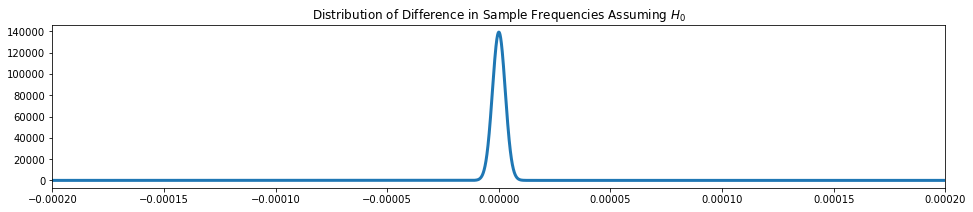

In [35]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.0002, .0002, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.0002, .0002)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [36]:
vet_sample_freq = 6535/22752000
pop_sample_freq = 37348/235201000
difference_in_sample_proportions = vet_sample_freq - pop_sample_freq
print(difference_in_sample_proportions)

0.00012843565461240499


In [37]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

0.0


Text(0.5, 1.0, 'p-value Reigon')

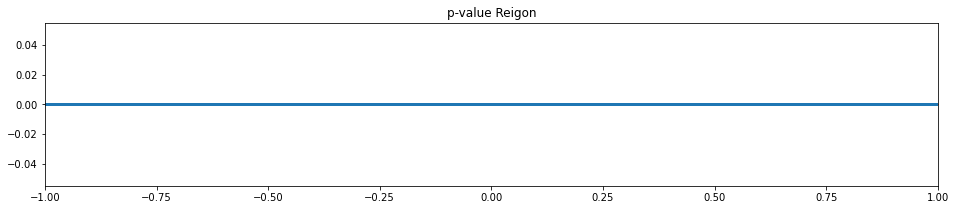

In [38]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Reigon")

In [39]:
vet_sample_freq = 6535/22752000
nonvet_sample_freq = 30813/212449000
difference_in_sample_proportions = vet_sample_freq - nonvet_sample_freq
print(difference_in_sample_proportions)

0.00014219033462380273


In [40]:
difference_in_proportions.cdf(difference_in_sample_proportions)

1.0

In [41]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

0.0


#### Testing with 2019 data

In [42]:
df_pop.tail(1)

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Veteran Suicide rate per million,Non-Veteran Suicide Deaths,Non-Veteran Population Estimate,"Non-Veteran Crude Rate per 100,000",Non-Veteran Suicide rate per million,US Population Suicide Deaths,US Population Population Estimate,"US Population Crude Rate per 100,000",US Population Suicide rate per million,Veteran Population Estimate (million),Non-Veteran Population Estimate (million),US Population Population Estimate (million)
18,2019,6261,19797000,31.6,316.260039,39600,235403373,16.8,168.221889,45861,255200373,18.0,179.70585,19.797,235.403373,255.200373


In [43]:
proportions_ztest

<function statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)>

In [44]:
shared_sample_freq = (6261 + 39600) / 255200373
shared_sample_variance = 255200373 * (shared_sample_freq * (1 - shared_sample_freq)) / (19797000*235403373)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

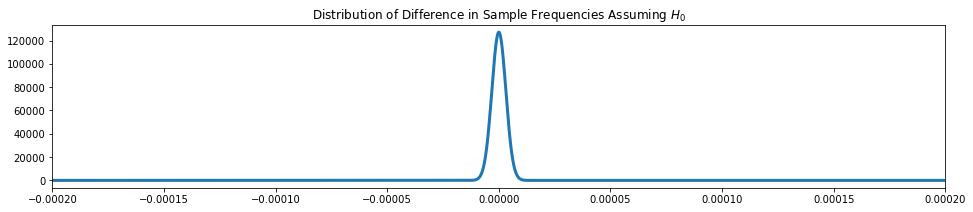

In [45]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.0002, .0002, num=10000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.0002, .0002)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [46]:
vet_sample_freq = 6261/19797000
nonvet_sample_freq = 39600/235403373
difference_in_sample_proportions = vet_sample_freq - nonvet_sample_freq
print(difference_in_sample_proportions)

0.00014803815075262959


In [47]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

0.0


In [48]:
df_all = df[['Veteran Crude Rate per 100,000', 'Non-Veteran Crude Rate per 100,000', 'US Population Crude Rate per 100,000']]

In [49]:
df_all.var()

Veteran Crude Rate per 100,000          10.145848
Non-Veteran Crude Rate per 100,000       2.298012
US Population Crude Rate per 100,000     2.255088
dtype: float64

In [50]:
df_all.describe()

,"Veteran Crude Rate per 100,000","Non-Veteran Crude Rate per 100,000","US Population Crude Rate per 100,000"
count,19.000000,19.000000,19.000000
mean,28.115789,14.563158,15.878947
std,3.185255,1.515919,1.501695
min,23.300000,12.600000,13.900000
25%,24.900000,13.050000,14.350000
50%,28.600000,14.500000,15.900000
75%,30.800000,15.800000,17.100000
max,33.000000,17.100000,18.400000


array([[<AxesSubplot:title={'center':'Veteran Crude Rate per 100,000'}>,
        <AxesSubplot:title={'center':'Non-Veteran Crude Rate per 100,000'}>],
       [<AxesSubplot:title={'center':'US Population Crude Rate per 100,000'}>,
        <AxesSubplot:>]], dtype=object)

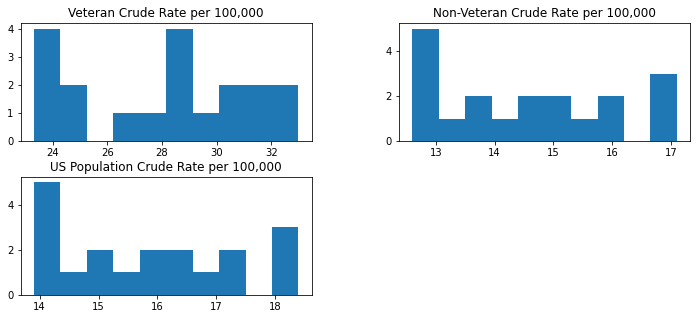

In [51]:
df_all.hist(figsize = (12,5), grid = False)


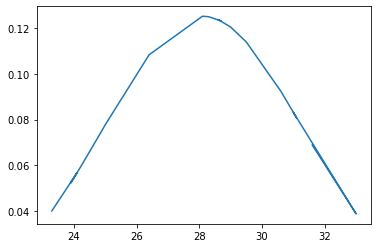

In [52]:
x_vet= df_all['Veteran Crude Rate per 100,000'] 
plt.plot(x_vet, stats.norm.pdf(x_vet, x_vet.mean(), x_vet.std()))
plt.show()

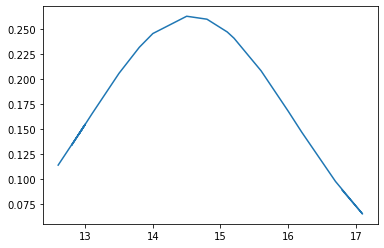

In [53]:
x_civ= df_all['Non-Veteran Crude Rate per 100,000'] 
plt.plot(x_civ, stats.norm.pdf(x_civ, x_civ.mean(), x_civ.std()))
plt.show()

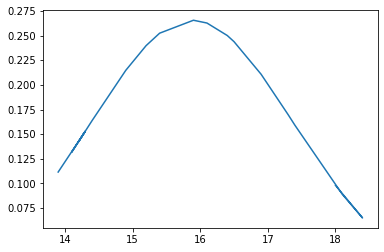

In [54]:
x_all = df_all['US Population Crude Rate per 100,000'] 
plt.plot(x_all, stats.norm.pdf(x_all, x_all.mean(), x_all.std()))
plt.show()

In [55]:
dfs = [df_all["Veteran Crude Rate per 100,000"], df_all["Non-Veteran Crude Rate per 100,000"]]
ix = ["Veteran Crude Rate per 100,000", "Non-Veteran Crude Rate per 100,000"]
description = []
for i, df in enumerate(dfs):
    description.append([df.mean(), df.median(), df.std()])

norm_df = pd.DataFrame(
    description,
    columns = ["Mean", "Median", "Standard Deviation"], 
    index = ix)

norm_df

,Mean,Median,Standard Deviation
"Veteran Crude Rate per 100,000",28.115789,28.6,3.185255
"Non-Veteran Crude Rate per 100,000",14.563158,14.5,1.515919


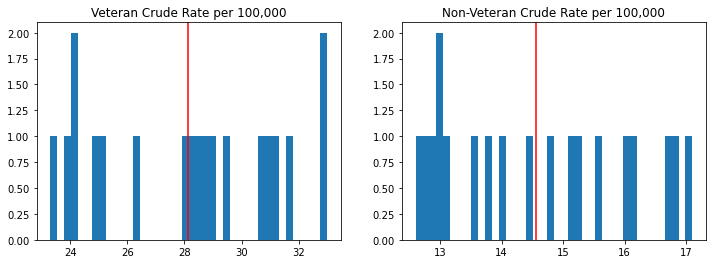

In [56]:
means = np.array(norm_df['Mean'])
titles = ["Veteran Crude Rate per 100,000", "Non-Veteran Crude Rate per 100,000"]

fig, axs = plt.subplots(1,2, figsize = (12,4))
for ax, df, title, mean in zip(axs.flatten(), dfs, titles, means):
    ax.hist(df, bins = 40)
    ax.set_title(title)
    ax.axvline(mean, color = "red")

In [57]:
df_all.describe()

,"Veteran Crude Rate per 100,000","Non-Veteran Crude Rate per 100,000","US Population Crude Rate per 100,000"
count,19.000000,19.000000,19.000000
mean,28.115789,14.563158,15.878947
std,3.185255,1.515919,1.501695
min,23.300000,12.600000,13.900000
25%,24.900000,13.050000,14.350000
50%,28.600000,14.500000,15.900000
75%,30.800000,15.800000,17.100000
max,33.000000,17.100000,18.400000


In [58]:
h0: veteran suicide rate < non-veteran suicide rate
ha: veteran suicide rate > non-veteran suicide rate

SyntaxError: invalid syntax (4279214699.py, line 1)

In [59]:
ztest(df_all['Veteran Crude Rate per 100,000'], df_all['Non-Veteran Crude Rate per 100,000'], value=0) 

(16.746454769787807, 6.010300284580564e-63)

In [60]:
df_total.info()

NameError: name 'df_total' is not defined

In [61]:
def create_line_plot(df,colx,coly,xlabel,ylabel,title):
    fig, ax = plt.subplots(figsize = (10,8))
    x = df[colx]
    y = df[coly]
    sns.lineplot(x, y, marker='o')
    ax.set_ylabel(xlabel, fontsize = 15)
    ax.set_xlabel(ylabel, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    ax.set_xticks(df['Year'])
    plt.yticks(fontsize = 13)
    plt.ylim((0,30))
    fig.tight_layout()  